In [69]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import mutual_info_score

# EDA

In [47]:
df_clients = pd.concat([pd.read_csv('data/client_train.csv')])

In [48]:
df_clients.head()

,disrict,client_id,client_catg,region,creation_date,target
0,60,train_Client_0,11,101,31/12/1994,0.0
1,69,train_Client_1,11,107,29/05/2002,0.0
2,62,train_Client_10,11,301,13/03/1986,0.0
3,69,train_Client_100,11,105,11/07/1996,0.0
4,62,train_Client_1000,11,303,14/10/2014,0.0


In [49]:
df_clients.columns

Index(['disrict', 'client_id', 'client_catg', 'region', 'creation_date',
       'target'],
      dtype='object')

In [50]:
df_clients['district'] = df_clients['disrict']
del df_clients['disrict']

In [51]:
df_clients.dtypes

client_id         object
client_catg        int64
region             int64
creation_date     object
target           float64
district           int64
dtype: object

In [52]:
df_clients.describe()

,client_catg,region,target,district
count,135493.000000,135493.000000,135493.000000,135493.000000
mean,11.512506,206.159809,0.055841,63.511222
std,4.423761,104.207044,0.229614,3.354400
min,11.000000,101.000000,0.000000,60.000000
25%,11.000000,103.000000,0.000000,62.000000
50%,11.000000,107.000000,0.000000,62.000000
75%,11.000000,307.000000,0.000000,69.000000
max,51.000000,399.000000,1.000000,69.000000


In [53]:
df_clients.isna().sum()

client_id        0
client_catg      0
region           0
creation_date    0
target           0
district         0
dtype: int64

In [54]:
for col in df_clients.columns:
    print("columnt:", col)
    print("unique values:", df_clients[col].unique())
    print("unique values count:", df_clients[col].nunique())
    print("**********")
    print()

columnt: client_id
unique values: ['train_Client_0' 'train_Client_1' 'train_Client_10' ...
 'train_Client_99997' 'train_Client_99998' 'train_Client_99999']
unique values count: 135493
**********

columnt: client_catg
unique values: [11 12 51]
unique values count: 3
**********

columnt: region
unique values: [101 107 301 105 303 103 309 311 304 104 312 305 306 308 372 307 313 310
 371 302 106 379 399 206 199]
unique values count: 25
**********

columnt: creation_date
unique values: ['31/12/1994' '29/05/2002' '13/03/1986' ... '16/08/2004' '30/08/1978'
 '25/05/1978']
unique values count: 8088
**********

columnt: target
unique values: [0. 1.]
unique values count: 2
**********

columnt: district
unique values: [60 69 62 63]
unique values count: 4
**********



In [55]:
df_clients.client_id.duplicated().sum()

np.int64(0)

In [56]:
df_clients.creation_date = pd.to_datetime(df_clients.creation_date, dayfirst=True)

<Axes: xlabel='target', ylabel='count'>

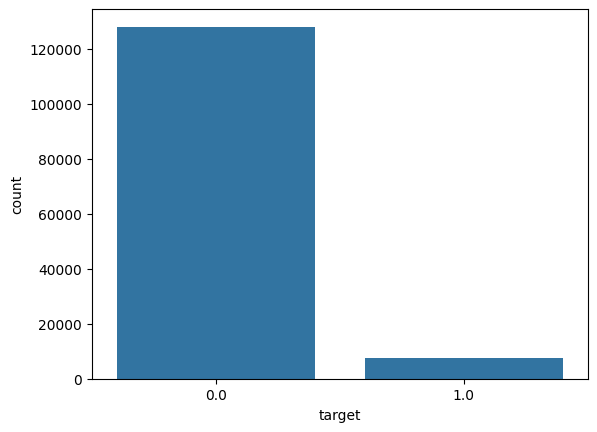

In [58]:
sns.countplot(x='target', data=df_clients)

In [59]:
df_clients['target'].value_counts(normalize=True)

target
0.0    0.944159
1.0    0.055841
Name: proportion, dtype: float64

In [60]:
global_fraud_rate = df_clients.target.mean()
print("Global Fraud Rate:", round(global_fraud_rate, 2)) # 6% of clients commit fraud

Global Fraud Rate: 0.06


<Axes: xlabel='district', ylabel='count'>

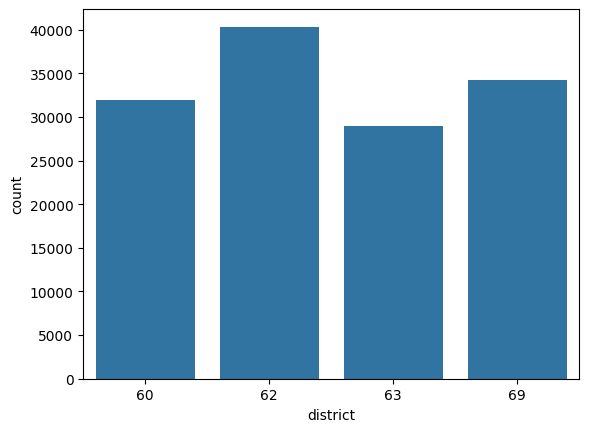

In [12]:
sns.countplot(x='district', data=df_clients)


In [65]:
def print_rate_and_risk(by):
    district_fraud = df_clients.groupby(by).target.agg(['mean', 'count'])
    district_fraud['diff'] = district_fraud['mean'] - global_fraud_rate
    district_fraud['risk'] = district_fraud['mean'] / global_fraud_rate
    print(district_fraud)

print_rate_and_risk('district')

              mean  count      diff      risk
district                                     
60        0.035869  31922 -0.019972  0.642341
62        0.051619  40353 -0.004221  0.924409
63        0.065236  28987  0.009396  1.168258
69        0.071485  34231  0.015644  1.280162


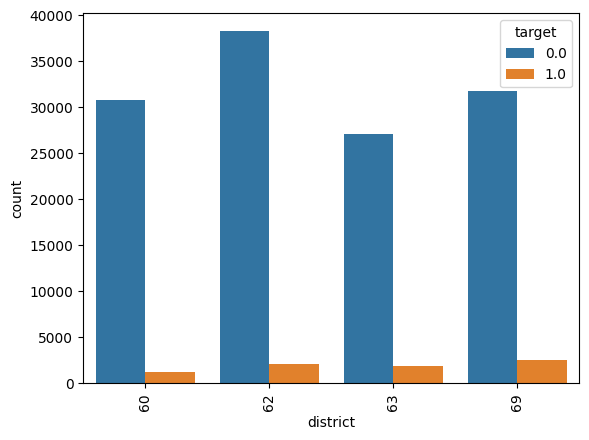

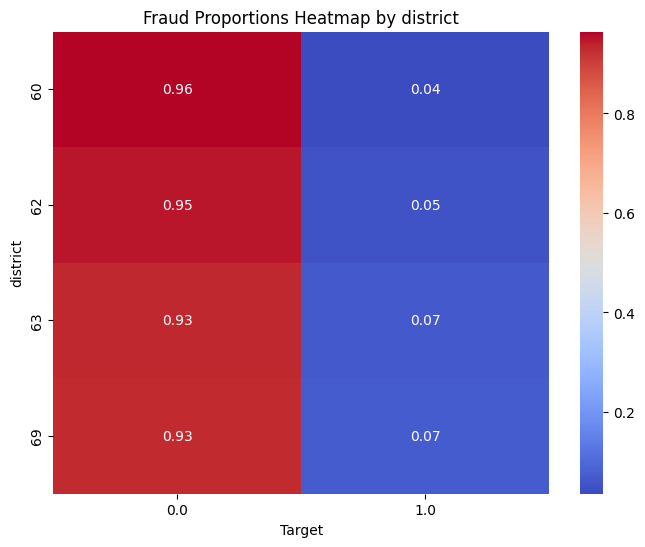

In [13]:
def fraud_proportions(by):
    sns.countplot(x=by, hue='target', data=df_clients).tick_params(axis='x', rotation=90)
    
    cross_tabulation = pd.crosstab(df_clients[by], df_clients.target, normalize='index')
    # ct_district.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
    plt.figure(figsize=(8, 6))
    sns.heatmap(cross_tabulation, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
    plt.title(f'Fraud Proportions Heatmap by {by}')
    plt.xlabel('Target')
    plt.ylabel(by)
    plt.show()


fraud_proportions('district')

In [70]:
mutual_info_score(df_clients.target, df_clients.district)

np.float64(0.0017772598794705413)

<Axes: xlabel='client_catg', ylabel='count'>

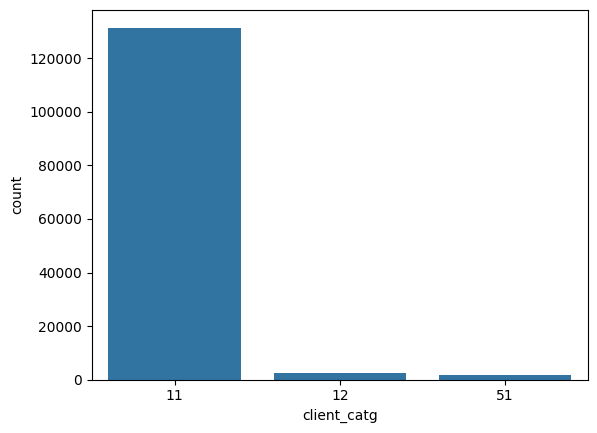

In [14]:
sns.countplot(x='client_catg', data=df_clients)

In [66]:
print_rate_and_risk('client_catg')

                 mean   count      diff      risk
client_catg                                      
11           0.054687  131494 -0.001154  0.979341
12           0.039638    2321 -0.016202  0.709844
51           0.168653    1678  0.112813  3.020265


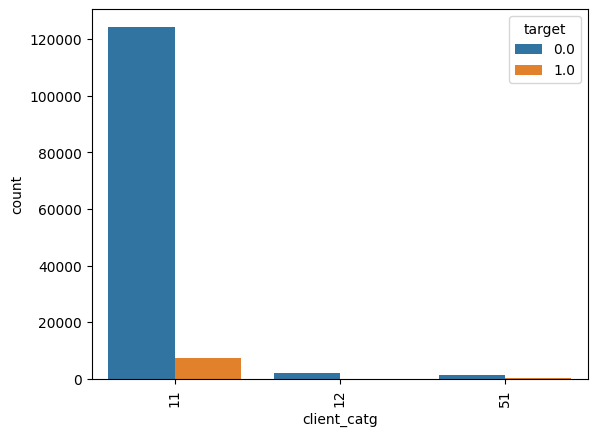

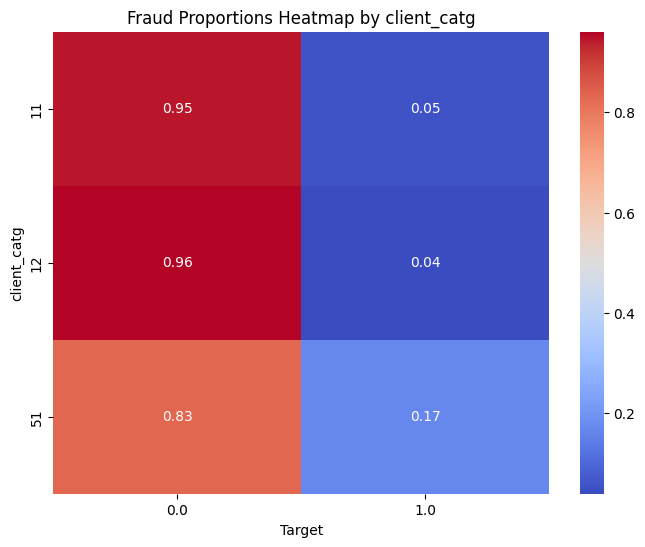

In [15]:
fraud_proportions('client_catg')

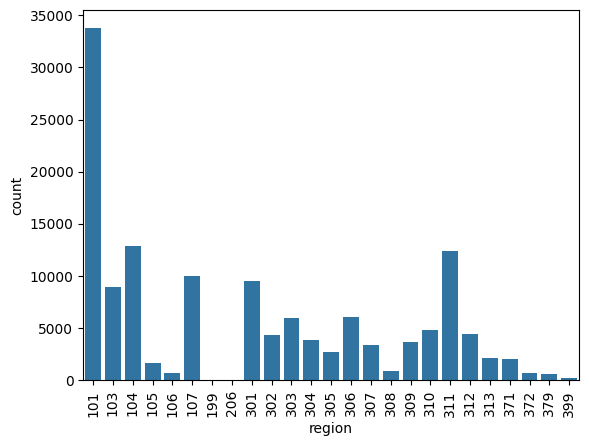

In [16]:
sns.countplot(x='region', data=df_clients).tick_params(axis='x', rotation=90)

In [67]:
print_rate_and_risk("region")

            mean  count      diff      risk
region                                     
101     0.035919  33770 -0.019921  0.643251
103     0.102967   8964  0.047127  1.843955
104     0.055966  12865  0.000125  1.002243
105     0.055927   1645  0.000087  1.001550
106     0.075071    706  0.019230  1.344379
107     0.065813   9998  0.009973  1.178591
199     0.000000      2 -0.055841  0.000000
206     0.018868     53 -0.036973  0.337889
301     0.033005   9544 -0.022835  0.591059
302     0.061703   4311  0.005862  1.104979
303     0.054497   5982 -0.001344  0.975937
304     0.066876   3828  0.011035  1.197619
305     0.057806   2716  0.001965  1.035191
306     0.048643   6044 -0.007197  0.871111
307     0.062204   3376  0.006363  1.113954
308     0.072533    841  0.016692  1.298926
309     0.043064   3669 -0.012777  0.771187
310     0.050917   4851 -0.004923  0.911835
311     0.080445  12406  0.024604  1.440619
312     0.049783   4379 -0.006057  0.891522
313     0.070809   2076  0.01496

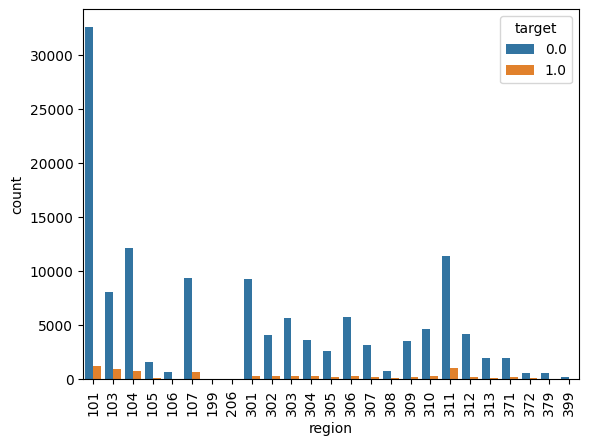

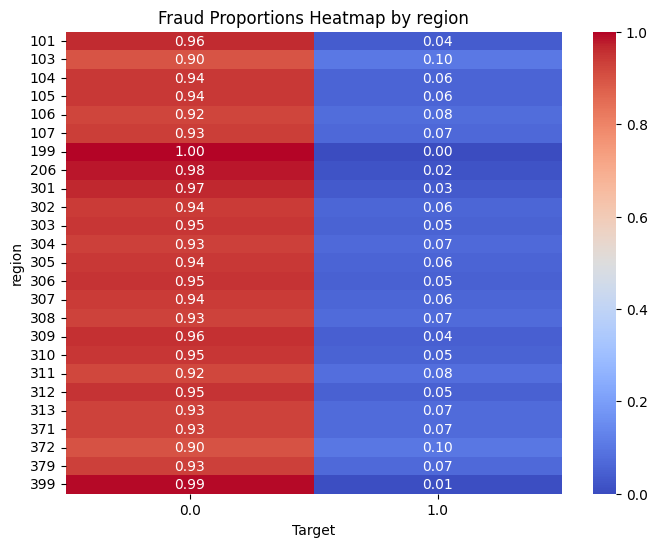

In [17]:
fraud_proportions('region')

<Axes: xlabel='region', ylabel='count'>

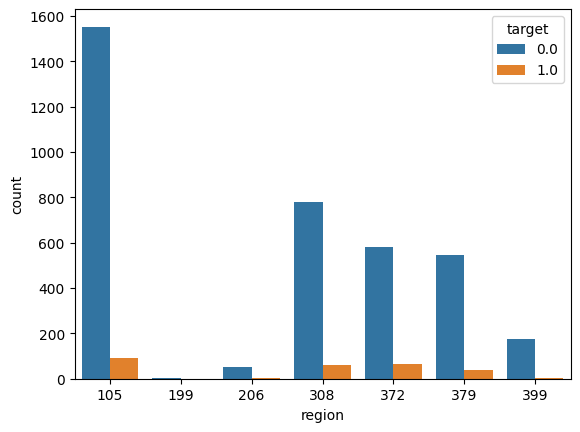

In [18]:
sns.countplot(x='region', hue='target', data=df_clients[df_clients.region.isin([105, 199, 206, 308, 372, 379, 399])])

In [19]:
len(df_clients[df_clients.region == 199])

2

In [22]:
df_invoices = pd.concat([pd.read_csv('data/invoice_train.csv')])

/var/folders/km/dql4gckx6ps4lrl0mdrhnsbh0000gn/T/ipykernel_62709/449422951.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df_invoices = pd.concat([pd.read_csv('data/invoice_train.csv')])


In [23]:
df_invoices.head()

,client_id,invoice_date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
0,train_Client_0,2014-03-24,11,1335667,0,203,8,1,82,0,0,0,14302,14384,4,ELEC
1,train_Client_0,2013-03-29,11,1335667,0,203,6,1,1200,184,0,0,12294,13678,4,ELEC
2,train_Client_0,2015-03-23,11,1335667,0,203,8,1,123,0,0,0,14624,14747,4,ELEC
3,train_Client_0,2015-07-13,11,1335667,0,207,8,1,102,0,0,0,14747,14849,4,ELEC
4,train_Client_0,2016-11-17,11,1335667,0,207,9,1,572,0,0,0,15066,15638,12,ELEC


In [24]:
df_invoices.columns

Index(['client_id', 'invoice_date', 'tarif_type', 'counter_number',
       'counter_statue', 'counter_code', 'reading_remarque',
       'counter_coefficient', 'consommation_level_1', 'consommation_level_2',
       'consommation_level_3', 'consommation_level_4', 'old_index',
       'new_index', 'months_number', 'counter_type'],
      dtype='object')

In [25]:
df_invoices['counter_status'] = df_invoices['counter_statue']
df_invoices['consumption_level_1'] = df_invoices['consommation_level_1']
df_invoices['consumption_level_2'] = df_invoices['consommation_level_2']
df_invoices['consumption_level_3'] = df_invoices['consommation_level_3']
df_invoices['consumption_level_4'] = df_invoices['consommation_level_4']

del df_invoices['counter_statue']
del df_invoices['consommation_level_1']
del df_invoices['consommation_level_2']
del df_invoices['consommation_level_3']
del df_invoices['consommation_level_4']

In [26]:
df_invoices.dtypes

client_id              object
invoice_date           object
tarif_type              int64
counter_number          int64
counter_code            int64
reading_remarque        int64
counter_coefficient     int64
old_index               int64
new_index               int64
months_number           int64
counter_type           object
counter_status         object
consumption_level_1     int64
consumption_level_2     int64
consumption_level_3     int64
consumption_level_4     int64
dtype: object

In [27]:
df_invoices.describe()

,tarif_type,counter_number,counter_code,reading_remarque,counter_coefficient,old_index,new_index,months_number,consumption_level_1,consumption_level_2,consumption_level_3,consumption_level_4
count,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06
mean,2.012804e+01,1.230587e+11,1.724884e+02,7.321702e+00,1.003040e+00,1.776700e+04,1.834970e+04,4.483095e+01,4.109795e+02,1.093225e+02,2.030620e+01,5.292588e+01
std,1.347256e+01,1.657267e+12,1.338871e+02,1.571654e+00,3.083466e-01,4.036693e+04,4.095321e+04,3.128335e+03,7.573080e+02,1.220123e+03,1.574239e+02,8.754725e+02
min,8.000000e+00,0.000000e+00,0.000000e+00,5.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.100000e+01,1.211080e+05,5.000000e+00,6.000000e+00,1.000000e+00,1.791000e+03,2.056000e+03,4.000000e+00,7.900000e+01,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.100000e+01,4.945610e+05,2.030000e+02,8.000000e+00,1.000000e+00,7.690000e+03,8.192000e+03,4.000000e+00,2.740000e+02,0.000000e+00,0.000000e+00,0.000000e+00
75%,4.000000e+01,1.115161e+06,2.070000e+02,9.000000e+00,1.000000e+00,2.166000e+04,2.234300e+04,4.000000e+00,6.000000e+02,0.000000e+00,0.000000e+00,0.000000e+00
max,4.500000e+01,2.798115e+13,6.000000e+02,4.130000e+02,5.000000e+01,2.800280e+06,2.870972e+06,6.366240e+05,9.999100e+05,9.990730e+05,6.449200e+04,5.479460e+05


In [28]:
df_invoices.isna().sum()

client_id              0
invoice_date           0
tarif_type             0
counter_number         0
counter_code           0
reading_remarque       0
counter_coefficient    0
old_index              0
new_index              0
months_number          0
counter_type           0
counter_status         0
consumption_level_1    0
consumption_level_2    0
consumption_level_3    0
consumption_level_4    0
dtype: int64

In [29]:
for col in df_invoices.columns:
    print("column:", col)
    print("unique values:", df_invoices[col].unique())
    print("unique values count:", df_invoices[col].nunique())
    print("**********")
    print()

column: client_id
unique values: ['train_Client_0' 'train_Client_1' 'train_Client_10' ...
 'train_Client_99997' 'train_Client_99998' 'train_Client_99999']
unique values count: 135493
**********

column: invoice_date
unique values: ['2014-03-24' '2013-03-29' '2015-03-23' ... '1995-11-28' '1982-07-04'
 '1996-09-02']
unique values count: 8275
**********

column: tarif_type
unique values: [11 40 15 10 12 14 13 45 29  9 30  8 21 42 27 18 24]
unique values count: 17
**********

column: counter_number
unique values: [1335667  678902  572765 ... 4811719  262195  560948]
unique values count: 201893
**********

column: counter_code
unique values: [203 207 413   5 467 202 420 410  10 483  25 433 407 204 214 442 453 506
 450 403 333 201 102 305 210 101 532  40 310 565 600 307 303 222  65   0
 227 325  16 317 367   1]
unique values count: 42
**********

column: reading_remarque
unique values: [  8   6   9   7 207 413 203   5]
unique values count: 8
**********

column: counter_coefficient
unique val

<Axes: xlabel='counter_status', ylabel='count'>

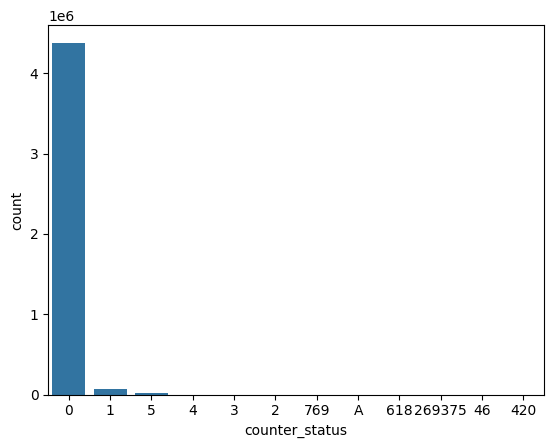

In [30]:
# df_invoice.counter_statue.value_counts().plot(kind='bar')
sns.countplot(x='counter_status', data=df_invoices)

In [31]:
len(df_invoices[df_invoices.counter_status == 'A'])

13

In [32]:
df_invoices.counter_status = pd.to_numeric(df_invoices.counter_status, errors='coerce').fillna(999999)

In [33]:
len(df_invoices[df_invoices.counter_status > 5])

47

In [34]:
df_invoices = df_invoices[df_invoices.counter_status < 5]

In [35]:
df_invoices.invoice_date = pd.to_datetime(df_invoices.invoice_date, yearfirst=True)

<Axes: xlabel='counter_status', ylabel='count'>

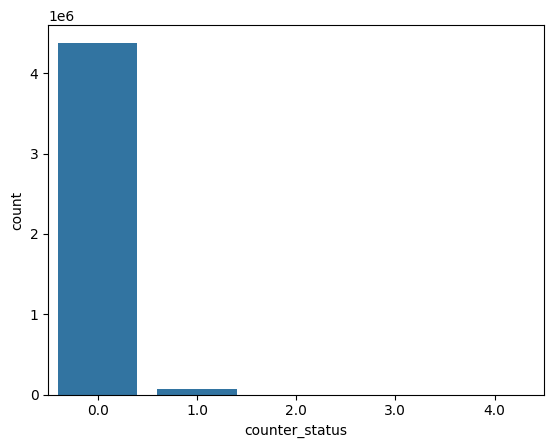

In [36]:
sns.countplot(x='counter_status', data=df_invoices)

<Axes: xlabel='counter_status', ylabel='count'>

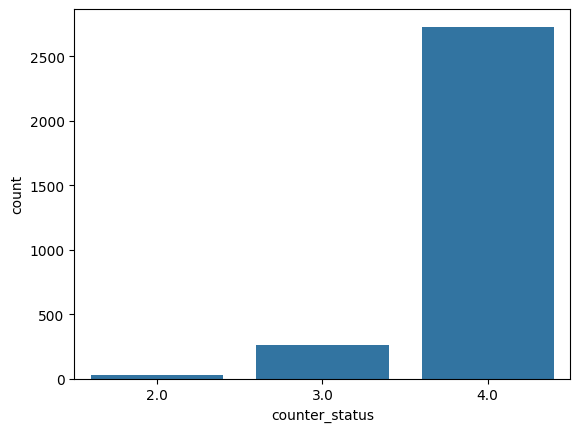

In [37]:
sns.countplot(x='counter_status', data=df_invoices[df_invoices.counter_status > 1])

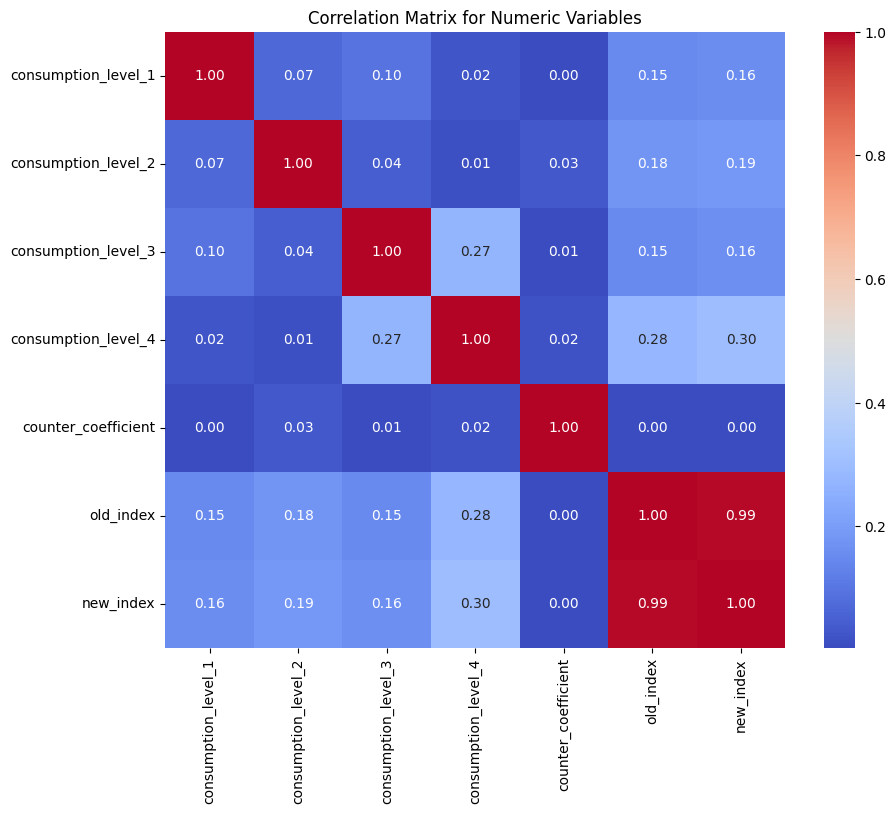

In [38]:
numeric_cols = ['consumption_level_1', 'consumption_level_2', 'consumption_level_3', 'consumption_level_4', 'counter_coefficient', 'old_index', 'new_index']

correlation_matrix = df_invoices[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix for Numeric Variables')
plt.show()

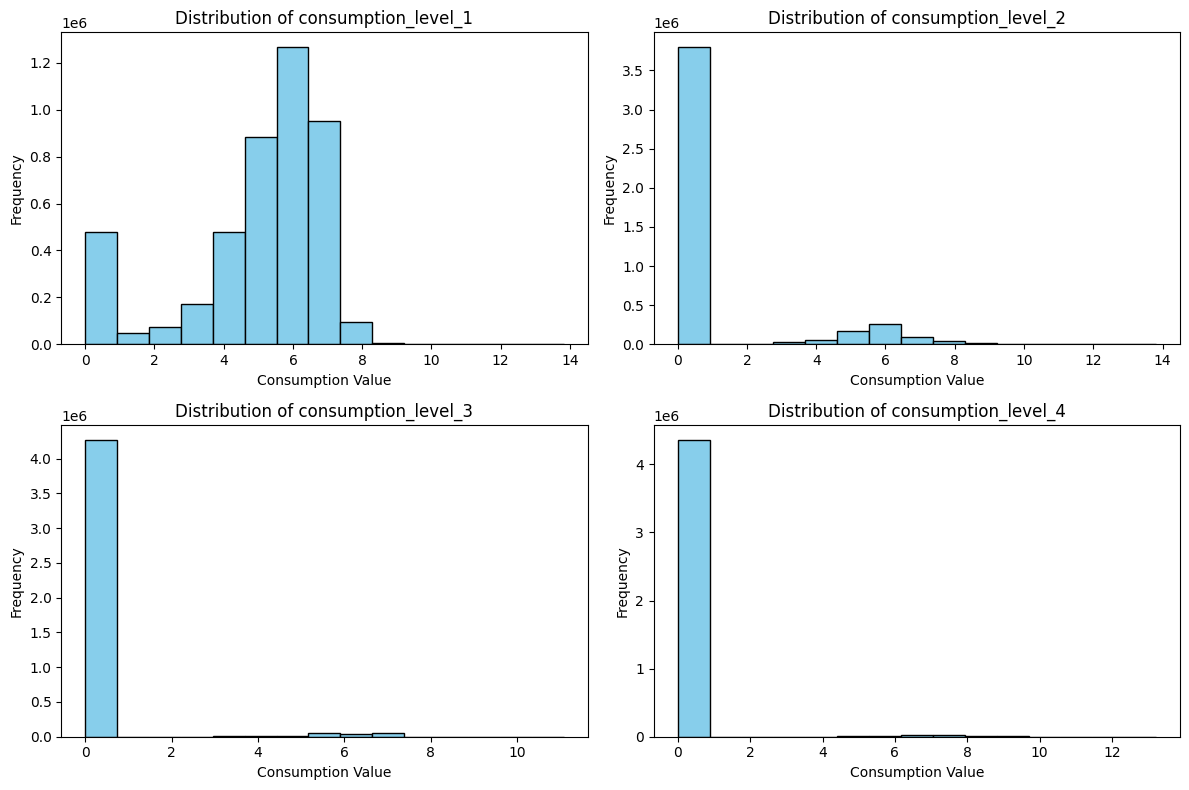

In [39]:
# Columns to analyze
consumption_cols = ['consumption_level_1', 'consumption_level_2', 'consumption_level_3', 'consumption_level_4']

plt.figure(figsize=(12, 8))
for i, col in enumerate(consumption_cols, 1):
    print()
    plt.subplot(2, 2, i)  # Create a 2x2 grid of subplots
    plt.hist(np.log1p(df_invoices[col]), bins=15, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel('Consumption Value')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


In [40]:
for col in consumption_cols:
    print(col)
    print(df_invoices[col].describe().apply("{0:.3f}".format))
    print("**********")
    print()

consumption_level_1
count    4456063.000
mean         412.321
std          754.938
min            0.000
25%           81.000
50%          276.000
75%          602.000
max       999910.000
Name: consumption_level_1, dtype: object
**********

consumption_level_2
count    4456063.000
mean         109.146
std         1202.830
min            0.000
25%            0.000
50%            0.000
75%            0.000
max       999073.000
Name: consumption_level_2, dtype: object
**********

consumption_level_3
count    4456063.000
mean          20.391
std          157.772
min            0.000
25%            0.000
50%            0.000
75%            0.000
max        64492.000
Name: consumption_level_3, dtype: object
**********

consumption_level_4
count    4456063.000
mean          53.146
std          877.433
min            0.000
25%            0.000
50%            0.000
75%            0.000
max       547946.000
Name: consumption_level_4, dtype: object
**********



In [41]:
df_clients_with_invoice = df_clients[df_clients.client_id.isin(df_invoices.client_id.drop_duplicates())]
print("Clients with invoice data:", len(df_clients_with_invoice))

df_clients_without_invoice = df_clients[~df_clients.client_id.isin(df_invoices.client_id.drop_duplicates())]
print("Clients without invoice data:", len(df_clients_without_invoice))

Clients with invoice data: 135423
Clients without invoice data: 70


In [42]:
df_clients = df_clients[df_clients.client_id.isin(df_invoices.client_id.drop_duplicates())]